In [2]:
import pandas as pd
import numpy as np
import warnings
import math
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [13]:
df_polytruth = pd.read_csv('poly_truth.tsv',sep='\t')
df_quantboot = pd.read_csv('quant_bootstraps.tsv',sep='\t')
#df_quantboot['ENST00000349363']
#print (df_polytruth[df_polytruth['transcript_id']=='ENST00000349363'])

# Calculating Transcript Deviation:

In [14]:
import numpy as np



#df_quantboot['ENST00000382369']

df_polytruth['mean']=0
df_polytruth['std']=0


df_new = df_polytruth
#df_new['transcript_id']

#for i in df_new.columns:
#    print i
#mean = df_quantboot[row].mean()
    #print df_new[df_new['transcript_id']==i]
    #print mean
    #df_polytruth['std']= np.std(df_quantboot[i])
    
    
df_new['mean']=0
df_new['std']=0
df_new['deviation']=0
for index,row in df_new.iterrows():
    #print row
    try:
        mean = df_quantboot[row['transcript_id']].mean()
   
        df_new.loc[df_new.transcript_id==row['transcript_id'],'mean']=mean
    
        std= np.std(df_quantboot[row['transcript_id']])
        df_new.loc[df_new.transcript_id==row['transcript_id'],'std']=std
    #print df_new['std']
        row['std']=std
        row['mean'] = mean
        if row['std']!=0:
        #print abs(row['count']-row['mean'])/row['std']
            df_new.loc[df_new.transcript_id==row['transcript_id'],'deviation']= abs(row['count']-row['mean'])/row['std']
    except:
        pass
    
#df_new.apply(test, axis=1)
#df_new
#df_new.sort_values()
df_new=df_new.sort_values('deviation', ascending=False)

df_faulty = df_new[df_new['deviation']>2]
    
df_good = df_new[df_new['deviation']<=2]

#df_new

In [15]:
df_quantsf = pd.read_csv("quant.sf",sep='\t')
df_faulty_prop=pd.DataFrame(columns=['Name','Length','EffectiveLength','TPM','NumReads','count','mean','std','deviation'])
df_good_prop=pd.DataFrame(columns=['Name','Length','EffectiveLength','TPM','NumReads','count','mean','std','deviation'])
df_combined = pd.DataFrame(columns=['Name','Length','EffectiveLength','TPM','NumReads','count','mean','std','deviation','faulty'])

for index,row in df_faulty.iterrows():
    df_faulty_prop = df_faulty_prop.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    df_faulty_prop.loc[df_faulty_prop.Name==row['transcript_id'],'count']=row['count']
    df_faulty_prop.loc[df_faulty_prop.Name==row['transcript_id'],'mean']=row['mean']
    df_faulty_prop.loc[df_faulty_prop.Name==row['transcript_id'],'std']=row['std']
    df_faulty_prop.loc[df_faulty_prop.Name==row['transcript_id'],'deviation']=row['deviation']
    
    #for combined
    df_combined = df_combined.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    df_combined.loc[df_combined.Name==row['transcript_id'],'count']=row['count']
    df_combined.loc[df_combined.Name==row['transcript_id'],'mean']=row['mean']
    df_combined.loc[df_combined.Name==row['transcript_id'],'std']=row['std']
    df_combined.loc[df_combined.Name==row['transcript_id'],'deviation']=row['deviation']
    df_combined.loc[df_combined.Name==row['transcript_id'],'faulty']=1
    #df_temp.loc[index]=df_quantsf[df_quantsf['Name']==row['transcript_id']]
for index,row in df_good.iterrows():
    df_good_prop = df_good_prop.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    df_good_prop.loc[df_good_prop.Name==row['transcript_id'],'count']=row['count']
    df_good_prop.loc[df_good_prop.Name==row['transcript_id'],'mean']=row['mean']
    df_good_prop.loc[df_good_prop.Name==row['transcript_id'],'std']=row['std']
    df_good_prop.loc[df_good_prop.Name==row['transcript_id'],'deviation']=row['deviation']
    
    #for combined
    df_combined = df_combined.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    df_combined.loc[df_combined.Name==row['transcript_id'],'count']=row['count']
    df_combined.loc[df_combined.Name==row['transcript_id'],'mean']=row['mean']
    df_combined.loc[df_combined.Name==row['transcript_id'],'std']=row['std']
    df_combined.loc[df_combined.Name==row['transcript_id'],'deviation']=row['deviation']
    df_combined.loc[df_combined.Name==row['transcript_id'],'faulty']=0
#df_quantsf[df_quantsf['Name']=='ENST00000342665']
#df_good_prop

df_good_prop.to_csv("good_prop.csv")

df_faulty_prop.to_csv("faulty_prop.csv")

df_combined.to_csv("combined_result.csv")
#df_combined

# Checking Correlation:

(17792, 10)


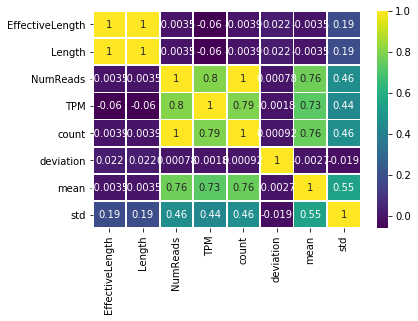

In [16]:
#df_faulty_cor = df_faulty_prop[['Length','deviation']].copy()
import seaborn as sns
import matplotlib.pyplot as plt
df_faulty_prop = pd.read_csv("faulty_prop.csv")
print (df_faulty_prop.shape)
df_faulty_cor = {'Length':df_faulty_prop['Length'],'deviation':df_faulty_prop['deviation'],'count':df_faulty_prop['count'], 'mean':df_faulty_prop['mean'],'std':df_faulty_prop['std'],'EffectiveLength':df_faulty_prop['EffectiveLength'],'TPM':df_faulty_prop['TPM'],'NumReads':df_faulty_prop['NumReads']}
df_faulty_cor = pd.DataFrame(df_faulty_cor).astype('float64')
#r = df_faulty_prop['deviation'].astype('float64').corr(df_faulty_prop['EffectiveLength'].astype('float64'))
#print r
r = df_faulty_cor.corr()
#print r
sns.heatmap(r, fmt=".2g", annot=True, cmap="viridis", linewidths=.8)
plt.show()

# Linear Regression:

In [17]:
df_res = pd.read_csv("combined_result.csv")
df_temp = {'EffectiveLength':df_res['EffectiveLength'], 'TPM':df_res['TPM'], 'faulty':df_res['faulty']}
df_temp = pd.DataFrame(df_temp)

X = {'EffectiveLength':df_temp['EffectiveLength'], 'TPM':df_temp['TPM']}
X = pd.DataFrame(X)
X = pd.DataFrame(X).values

#X = df_temp['deviation'].values[:,np.newaxis]
y =  df_res['faulty'].values

#length =  df_temp.count()
regr = linear_model.LinearRegression()
regr.fit(X,y)
print (regr.coef_)

#print df_res.shape

[  2.48549176e-05   7.93667107e-05]


# Scatter Plots

RELATION BETWEEN TPM AND DEVIATION FOR GOOD TRANSCRIPTS:

(9097, 10)


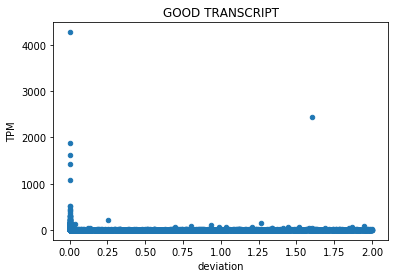

TPM          7917
deviation    7917
dtype: int64


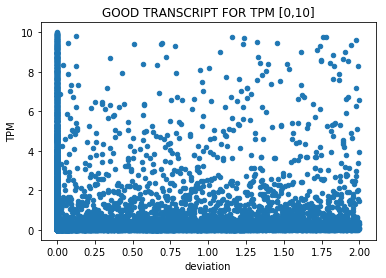

In [18]:
df_good_prop = pd.read_csv("good_prop.csv")
print (df_good_prop.shape)
df_temp = {'TPM':df_good_prop['TPM'],'deviation':df_good_prop['deviation']}
df_temp = pd.DataFrame(df_temp)

#df_temp = df_temp[df_temp['TPM']]
df_temp.plot(kind='scatter', x ='deviation', y ='TPM',title= 'GOOD TRANSCRIPT')
plt.show()

df_temp = df_temp[(df_temp['TPM']>=0) & (df_temp['TPM']<=10)]
print (df_temp.count())

df_temp.plot(kind='scatter', x ='deviation', y ='TPM',title= 'GOOD TRANSCRIPT FOR TPM [0,10]')
plt.show()

RELATION BETWEEN TPM AND DEVIATION FOR FAULTY TRANSCRIPTS:

(17792, 2)


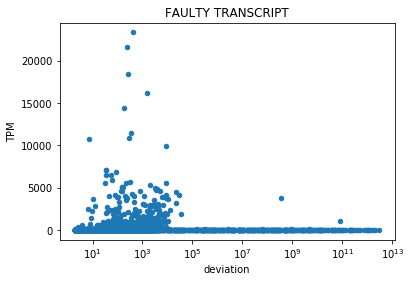

TPM          11140
deviation    11140
dtype: int64


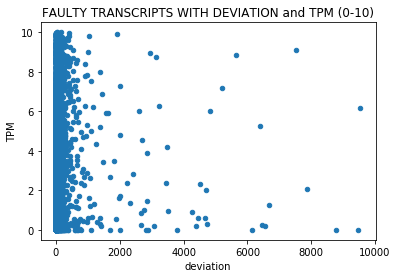

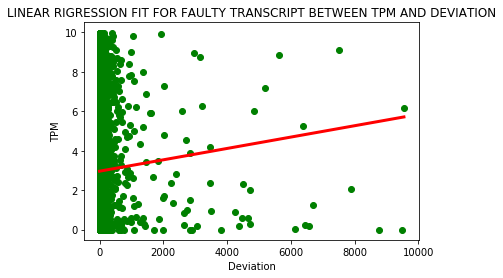

In [10]:

df_temp = {'TPM':df_faulty_prop['TPM'],'deviation':df_faulty_prop['deviation']}
df_temp = pd.DataFrame(df_temp)
print (df_temp.shape)
df_temp.plot(kind='scatter', x ='deviation', y ='TPM',logx=1, title='FAULTY TRANSCRIPT')
plt.show()

#df_temp['deviation'] = df_temp['deviation'].apply(np.log)
df_temp = df_temp[df_temp['deviation']<(10000)]
df_temp = df_temp[(df_temp['TPM']>=0) & (df_temp['TPM']<=10)]
print (df_temp.count())
df_temp.plot(kind='scatter', x ='deviation', y ='TPM', title='FAULTY TRANSCRIPTS WITH DEVIATION and TPM (0-10)')
#plt.ylim((500,8000))
plt.show()


X = df_temp['deviation'].values[:,np.newaxis]
y =  df_temp['TPM'].values
length =  df_temp.count()
regr = linear_model.LinearRegression()
regr.fit(X,y)
plt.scatter(X,y,  color='green')
plt.plot(X, regr.predict(X), color='red', linewidth=3)
plt.xlabel("Deviation")
plt.ylabel("TPM")
plt.title("LINEAR RIGRESSION FIT FOR FAULTY TRANSCRIPT BETWEEN TPM AND DEVIATION")
plt.show()

# Conclusion: For TPM>10, 84.9% of the Transcripts are faulty.

RELATION BETWEEN EFFECTIVE LENGTH AND DEVIATION FOR GOOD TRANSCRIPTS:

EffectiveLength    9097
deviation          9097
dtype: int64


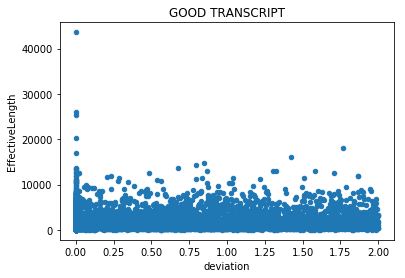

EffectiveLength    8540
deviation          8540
dtype: int64


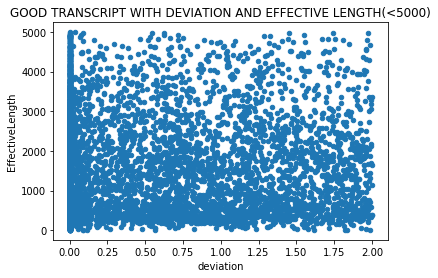

In [9]:
df_good_prop = pd.read_csv("good_prop.csv")
#print df_good_prop.shape
df_temp = {'EffectiveLength':df_good_prop['EffectiveLength'],'deviation':df_good_prop['deviation']}

df_temp = pd.DataFrame(df_temp)
#df_temp = df_temp[df_temp['EffectiveLength']<4000]
print (df_temp.count())
df_temp.plot(kind='scatter', x ='deviation', y ='EffectiveLength', title= 'GOOD TRANSCRIPT')
plt.show()

df_temp = df_temp[df_temp['EffectiveLength']<5000]
print (df_temp.count())
df_temp.plot(kind='scatter', x ='deviation', y ='EffectiveLength', title= 'GOOD TRANSCRIPT WITH DEVIATION AND EFFECTIVE LENGTH(<5000)')
plt.show()

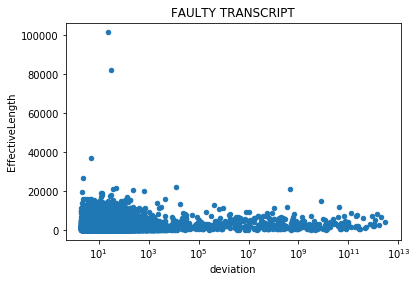

EffectiveLength    15986
deviation          15986
dtype: int64


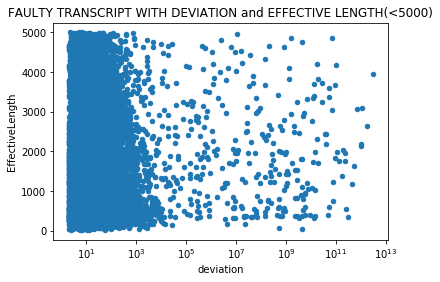

In [8]:
df_temp = {'EffectiveLength':df_faulty_prop['EffectiveLength'],'deviation':df_faulty_prop['deviation']}
df_temp = pd.DataFrame(df_temp)

df_temp.plot(kind='scatter', x ='deviation', y ='EffectiveLength',logx=1,title= 'FAULTY TRANSCRIPT')
plt.show()

df_temp = df_temp[df_temp['EffectiveLength']<5000]
#df_temp = df_temp[df_temp['deviation']<30]
print (df_temp.count())
df_temp.plot(kind='scatter', x ='deviation', y ='EffectiveLength',logx=1,title= 'FAULTY TRANSCRIPT WITH DEVIATION and EFFECTIVE LENGTH(<5000)')
plt.show()

# Conclusion: Transcripts with Effective length > 5000 are 76.4% faulty

In [4]:
combined = pd.read_csv("combined_result.csv")

# Classification

In [5]:
train_x, test_x, train_y, test_y = train_test_split(combined[['EffectiveLength','NumReads','mean','Length','TPM','std']],
    combined['faulty'], train_size=0.7)

In [6]:
result =  pd.DataFrame()
# fit a logistic regression model to the data
model = LogisticRegression()
model.fit(train_x, train_y)
print(model)
# make predictions
expected = test_y
predicted = model.predict(test_x)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("MSE : ",mean_squared_error(expected,predicted))
print("Accuracy : ",metrics.accuracy_score(expected,predicted, normalize=False))
print("Accuracy : ",metrics.accuracy_score(expected,predicted))
result['expected'] = expected
result['LR'] = predicted

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.76      0.55      0.64      2758
          1       0.79      0.91      0.85      5309

avg / total       0.78      0.79      0.78      8067

[[1507 1251]
 [ 468 4841]]
('MSE : ', 0.21309036816660468)
('Accuracy : ', 6348)
('Accuracy : ', 0.78690963183339535)


# Regression Models

In [37]:
good = pd.read_csv("good_prop.csv")
faulty = pd.read_csv("faulty_prop.csv")

In [38]:
rcount_df = pd.read_csv("num_times.csv")
tcount_df = pd.read_csv("tcount_new.csv")

In [39]:
combined_df = pd.read_csv('combined_result.csv')
#combined_df = combined_df.reset_index
combined_df.drop('Unnamed: 0', axis=1, inplace=True)
updated_combined  = pd.merge(combined_df,rcount_df,on='transcript_id', how='inner')

updated_combined  = pd.merge(updated_combined,tcount_df,on='transcript_id', how='inner')
updated_combined['diff'] = updated_combined['count']-updated_combined['mean']
#updated_combined.columns

updated_combined['eq_param'] = updated_combined['tcount']/updated_combined['times']

updated_combined.dropna(inplace=True)
updated_combined

,EffectiveLength,Length,transcript_id,NumReads,TPM,count,deviation,faulty,mean,std,times,tcount,diff,eq_param
0,3951.991,4151,ENST00000436887,1682.949637,13.105338,2304,2.972480e+12,1,5.490000e-11,7.750000e-10,12,63,2304.0,5.250000
1,6652.991,6852,ENST00000389003,2524.897299,11.679381,3042,2.097560e+12,1,1.030000e-10,1.450000e-09,4,10,3042.0,2.500000
2,2644.991,2844,ENST00000382457,4915.597872,57.193308,6150,1.717650e+12,1,2.540000e-10,3.580000e-09,4,10,6150.0,2.500000
3,8495.991,8695,ENST00000357308,3621.213266,13.116957,4203,1.347880e+12,1,2.210000e-10,3.120000e-09,2,3,4203.0,1.500000
4,5017.991,5217,ENST00000499879,2380.933354,14.601935,2978,1.207530e+12,1,1.750000e-10,2.470000e-09,4,10,2978.0,2.500000
5,3093.991,3293,ENST00000374082,2361.047208,23.484358,2330,1.066880e+12,1,2.190000e-10,2.180000e-09,9,49,2330.0,5.444444
6,2177.991,2377,ENST00000578558,3231.733286,45.663849,4286,1.040660e+12,1,2.920000e-10,4.120000e-09,18,69,4286.0,3.833333
7,2131.991,2331,ENST00000367024,1532.106648,22.115497,1826,9.811500e+11,1,1.790000e-10,1.860000e-09,12,54,1826.0,4.500000
8,7411.991,7611,ENST00000237163,608.000000,2.524421,641,8.837180e+11,1,5.140000e-11,7.250000e-10,9,25,641.0,2.777778
9,3064.991,3264,ENST00000433501,741.000000,7.440156,915,7.159190e+11,1,9.060000e-11,1.280000e-09,5,20,915.0,4.000000


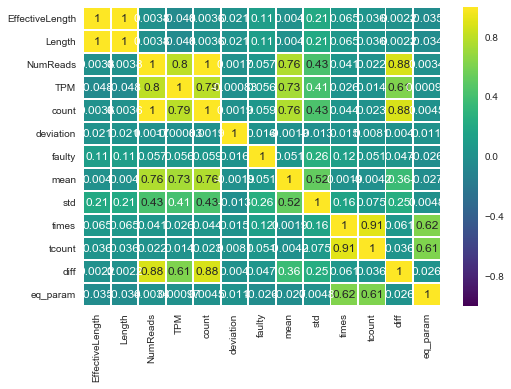

In [22]:
r = updated_combined.corr()
#print r
sns.heatmap(r, fmt=".2g", annot=True, cmap="viridis", linewidths=.8)
plt.show()

In [40]:
train_x = updated_combined[['transcript_id','EffectiveLength','NumReads','Length','TPM','eq_param','mean','faulty','count']]
train_y = updated_combined['diff']

test_x = updated_combined[updated_combined['faulty']==1][['transcript_id','EffectiveLength','NumReads','Length','TPM','eq_param','mean','faulty','count']]

test_y = updated_combined[updated_combined['faulty']==1]['diff']
test_y.reset_index(drop=True, inplace=True)

In [25]:
#test_y.reset_index(drop=True, inplace=True)

In [41]:
#Linear Regression
lm = LinearRegression()
lm.fit(train_x.drop(['transcript_id','count'],axis=1), train_y)
lr_predict = lm.predict(test_x.drop(['transcript_id','count'],axis=1))
mse = np.mean((lr_predict - test_y)**2)
print mse

1288892.49335


In [42]:
#Ridge Regression
ridge = Ridge(alpha=0.5, normalize=False)
ridge.fit(train_x.drop(['transcript_id','count'],axis=1),train_y)
ridge_predict = ridge.predict(test_x.drop(['transcript_id','count'],axis=1))
mse = np.mean((ridge_predict - test_y)**2)
print mse

1288892.4999


In [43]:
#Lasso Regression
lasso =  Lasso(alpha=0.3, normalize=False)
lasso.fit(train_x.drop(['transcript_id','count'],axis=1),train_y)
lasso_predict = lasso.predict(test_x.drop(['transcript_id','count'],axis=1))
mse = np.mean((lasso_predict - test_y)**2)
print mse

1288902.73751


In [44]:
res = pd.DataFrame({'predict':lr_predict, 'original':test_y})
res
temp = test_x.reset_index(drop=True)
temp['predict_diff'] = lr_predict
#updated_combined['predict_diff'] = ridge_predict
temp['diff'] =  test_y
temp

,transcript_id,EffectiveLength,NumReads,Length,TPM,eq_param,mean,faulty,count,predict_diff,diff
0,ENST00000436887,3951.991,1682.949637,4151,13.105338,5.250000,5.490000e-11,1,2304,2058.351475,2304.000000
1,ENST00000389003,6652.991,2524.897299,6852,11.679381,2.500000,1.030000e-10,1,3042,3018.277199,3042.000000
2,ENST00000382457,2644.991,4915.597872,2844,57.193308,2.500000,2.540000e-10,1,6150,5862.915764,6150.000000
3,ENST00000357308,8495.991,3621.213266,8695,13.116957,1.500000,2.210000e-10,1,4203,4298.237132,4203.000000
4,ENST00000499879,5017.991,2380.933354,5217,14.601935,2.500000,1.750000e-10,1,2978,2858.440678,2978.000000
5,ENST00000374082,3093.991,2361.047208,3293,23.484358,5.444444,2.190000e-10,1,2330,2865.966255,2330.000000
6,ENST00000578558,2177.991,3231.733286,2377,45.663849,3.833333,2.920000e-10,1,4286,3882.448240,4286.000000
7,ENST00000367024,2131.991,1532.106648,2331,22.115497,4.500000,1.790000e-10,1,1826,1882.576190,1826.000000
8,ENST00000237163,7411.991,608.000000,7611,2.524421,2.777778,5.140000e-11,1,641,741.938561,641.000000
9,ENST00000433501,3064.991,741.000000,3264,7.440156,4.000000,9.060000e-11,1,915,940.539264,915.000000


In [45]:
df_quantboot = pd.read_csv("quant_bootstraps.tsv", sep='\t')
#print df_quantboot
#temp['count'][7]

In [46]:
import numpy as np
#df_polytruth['std']=0
temp['new_std']=0
temp['new_mean']=0
temp['new_deviation']=0
#print temp
for index,row in temp.iterrows():
    #print index
    #try:
        #print index
        #temp['new_mean'][index]
        df_quantboot[row['transcript_id']] = df_quantboot[row['transcript_id']]+row['predict_diff']
        
        temp['new_mean'][index] = df_quantboot[row['transcript_id']].mean()
        #temp[row['transcript_id']==df_quantboot[row['transcript_id']]]['new_mean'] = df_quantboot[row['transcript_id']].mean()
        temp['new_std'][index] = df_quantboot[row['transcript_id']].std()
        temp['new_deviation'][index] = (temp['count'][index]-temp['new_mean'][index])//temp['new_std'][index]
        #print (row['count']-row['new_mean'])//row['new_std']
    #except:
        #print index,
     #   pass

temp=temp.sort_values('new_deviation', ascending=False)
#print temp
df_faulty_new = temp[(temp['new_deviation']>2) | (temp['new_deviation'] < -2)]
    
df_good_new = temp[(temp['new_deviation']<= 2) & (temp['new_deviation'] >= -2)]

#temp.head(10)
df_faulty_new.to_csv("updated_faulty.csv")
df_good_new.to_csv("updated_good.csv")
temp
#df_quantboot

,transcript_id,EffectiveLength,NumReads,Length,TPM,eq_param,mean,faulty,count,predict_diff,diff,new_std,new_mean,new_deviation
365,ENST00000426651,857.991,114323.508400,1057,4100.586674,2.000000,21.721043,1,154462,133339.292070,154440.278957,5,133361,4220
380,ENST00000600147,1191.991,123868.204900,1391,3198.011379,3.142857,43.452013,1,162546,145230.721706,162502.547987,7,145274,2467
360,ENST00000440692,2614.991,159359.698500,2814,1875.432214,2.500000,29.934401,1,200434,188233.746535,200404.065599,5,188263,2434
452,ENST00000549649,594.998,5204.000000,794,269.162451,2.000000,1.812684,1,7435,6083.912784,7433.187316,1,6085,1350
461,ENST00000533969,156.013,7986.000000,355,1575.293444,2.000000,7.444662,1,11277,8570.242180,11269.555338,2,8577,1350
437,ENST00000586656,237.009,14642.397010,436,1901.251246,4.600000,7.492233,1,20213,16294.697562,20205.507767,3,16302,1303
415,ENST00000549870,366.005,11725.096950,565,985.875618,6.636364,1.843799,1,14628,13420.233833,14626.156201,1,13422,1206
424,ENST00000535465,740.998,27958.879640,940,1161.169598,2.500000,24.178052,1,38497,32546.977001,38472.821948,5,32571,1185
502,ENST00000560274,57.798,5719.975966,256,3045.619780,2.000000,5.741807,1,7210,4959.923647,7204.258193,2,4965,1122
433,ENST00000534784,537.999,9082.394680,737,519.531136,6.000000,4.068900,1,12514,10563.369446,12509.931100,2,10567,973


In [47]:
df_faulty_new.shape

(12161, 14)

In [48]:
df_good_new.shape

(5613, 14)

In [ ]:
df_quantboot.to_csv("updated_quantboot.csv")